<h1>Introducción a Redes Neuronales </h1>
<h2>Aula Invertida 2025 </h2>
<h2>CURSO AECID </h2>
</center>

Desarrollado por :  Nestor Caal Suc<p>




In [ ]:
# Paso 1: Librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [ ]:
# Paso 2: Simular datos tipo bosque vs no bosque
# Usamos make_moons para generar datos que NO son linealmente separables
X, y = make_moons(n_samples=500, noise=0.2, random_state=50)

# Dividir datos
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)



In [ ]:
# Paso 3: Modelo SIN capas ocultas
modelo_lineal = Sequential([
    Dense(1, input_shape=(2,), activation='sigmoid')
])
modelo_lineal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo_lineal.fit(x_train, y_train, epochs=100, verbose=0)




In [ ]:
# Paso 4: Modelo CON capas ocultas
modelo_profundo = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])
modelo_profundo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo_profundo.fit(x_train, y_train, epochs=100, verbose=0)



In [ ]:
# Paso 5: Función para graficar las regiones de decisión
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor='k')
    plt.title(title)
    plt.xlabel("NDVI (simulado)")
    plt.ylabel("EVI (simulado)")
    plt.grid(True)



2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


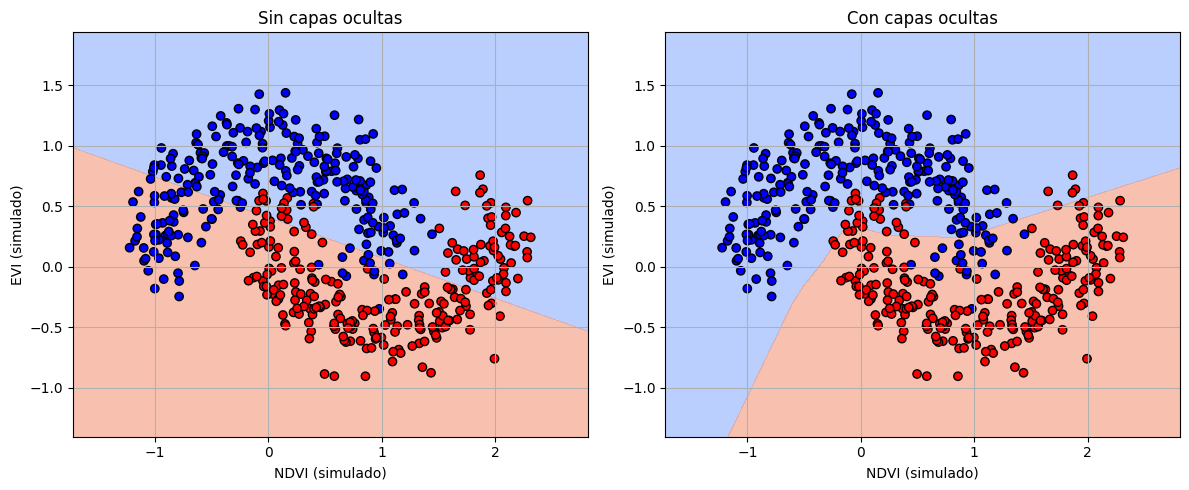

In [ ]:
# Paso 6: Mostrar ambos modelos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(modelo_lineal, X, y, "Sin capas ocultas")

plt.subplot(1, 2, 2)
plot_decision_boundary(modelo_profundo, X, y, "Con capas ocultas")

plt.tight_layout()
plt.show()